In [26]:
#this is an analysis about NLP, and we are going to take it step by step
#lets start by importing basic EDA tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from numpy import std

In [27]:
#ets bring in our data
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
train_data.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499


In [4]:
train_data.shape, test_data.shape

((2326, 7), (997, 6))

In [5]:
#since we are dealing with phones, we can agree that the property of phones that affect price is the memory
train_data['City'].nunique()

16

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   2326 non-null   int64 
 1   Model_Info              2326 non-null   object
 2   Additional_Description  2326 non-null   object
 3   Locality                2326 non-null   int64 
 4   City                    2326 non-null   int64 
 5   State                   2326 non-null   int64 
 6   Price                   2326 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 127.3+ KB


In [7]:
train_data['Brand'].nunique()

4

In [8]:
train_data['State'].nunique()

9

In [9]:
train_data['City'].nunique()

16

In [10]:
train_data['Locality'].nunique()

970

In [11]:
#no missing values in the train data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   997 non-null    int64 
 1   Model_Info              997 non-null    object
 2   Additional_Description  997 non-null    object
 3   Locality                997 non-null    int64 
 4   City                    997 non-null    int64 
 5   State                   997 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 46.9+ KB


In [12]:
#no missing value for  test data
test_data['City'].nunique()

15

In [13]:
len(np.intersect1d(train_data['City'],test_data['City']))#equal categories in the train and test data

11

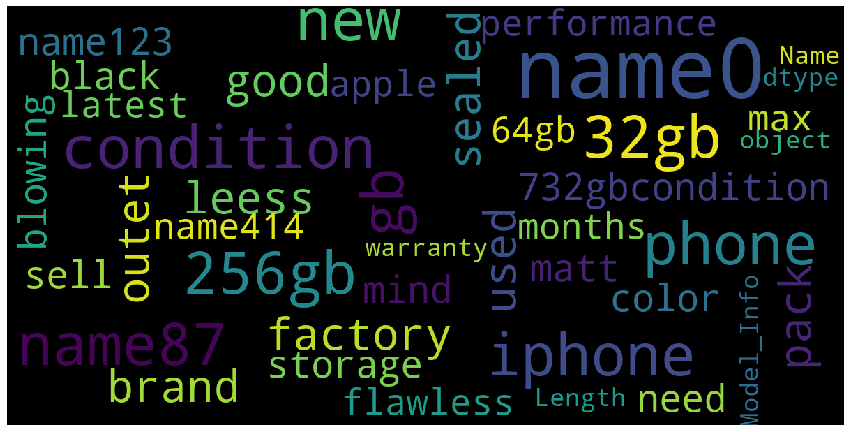

In [15]:
#a function to show frequently occuring words
from wordcloud import WordCloud, STOPWORDS
stopwords1 = set(STOPWORDS)
from sklearn.utils import shuffle

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords1,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train_data[train_data.Price>=18945]['Model_Info'])

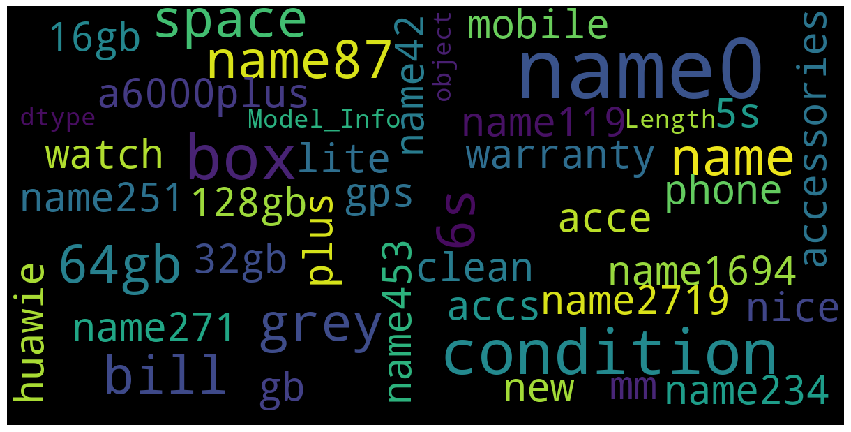

In [17]:
show_wordcloud(train_data[train_data.Price<18945]['Model_Info'])

In [28]:
#from the word cloud, we can see that the memory is important before considering the price
#lets create another column to differentiate the memory size
#first, lets define a function to help us find emory size
def finding(v):
    if v.find("32gb")!=-1 or v.find("32 gb")!=-1:
        return 1
    elif v.find("64gb")!=-1 or v.find("64 gb")!=-1:
        return 2
    elif v.find("128gb")!=-1 or v.find("128 gb")!=-1:
        return 3
    elif v.find("256gb")!=-1 or v.find("256 gb")!=-1:
        return 4
    else:
        return 0

In [29]:
train_data['Class'] = train_data['Model_Info'].apply(finding)
test_data['Class'] = test_data['Model_Info'].apply(finding)

In [30]:
train_data.head()

,Brand,Model_Info,Additional_Description,Locality,City,State,Price,Class
0,1,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,8,2,15000,2
1,1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,4,0,18800,0
2,1,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,11,4,50000,4
3,1,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,10,7,16500,2
4,1,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,4,0,26499,0


In [1]:
#lets see the relattionship(correlation) between locality, city and state with the price
import seaborn as sns
fig,axs=plt.subplots(nrows=1,figsize=(13,13))
sns.heatmap(train_data.corr(),
           annot=True,square=True,cmap='viridis',
           linewidths=2,linecolor='black',annot_kws={'size':12});

NameError: name 'plt' is not defined

In [31]:
overall = train_data.append(test_data, ignore_index=True, sort=False)#we had to appen because the categories of state were not equal for both test and train

In [32]:
overall = pd.get_dummies(overall, columns=['State',"Brand", 'City'], drop_first=False)

In [33]:
train_data, test_data=overall[overall.Price.isnull()==False], overall[overall.Price.isnull()==True]#split the data using condition of true of false for price value
test_data.reset_index(drop=True, inplace=True)
target = np.log1p(train_data['Price'])#applying log transformation to the price

In [34]:
train_data.head()

,Model_Info,Additional_Description,Locality,Price,Class,State_0,State_1,State_2,State_3,State_4,...,City_10,City_11,City_12,City_13,City_14,City_15,City_16,City_17,City_18,City_19
0,name0 name234 64gb space grey,1yesr old mobile number 999two905two99 bill c...,878,15000.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,phone 7 name42 name453 new condition box acce...,101004800 1010065900 7000,1081,18800.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,name0 x 256gb leess used good condition,1010010000 seperate screen guard 3 back cover...,495,50000.0,4,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,name0 6s plus 64 gb space grey,without 1010020100 id 1010010300 colour 10100...,287,16500.0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,phone 7 sealed pack brand new factory outet p...,101008700 10100000 xs max 64 gb made 10100850...,342,26499.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
import pickle
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text =  re.sub(" \d+", " ", text)#numbers only
    text = re.sub('\w*\d\w*', '', text)#numbers and texts
    return text

round1 = lambda x: clean_text_round1(x)

In [36]:
# Let's take a look at the updated text
train_clean = pd.DataFrame(train_data.Model_Info.apply(round1))
train_clean.head()

,Model_Info
0,gb space grey
1,phone new condition box accessories
2,x gb leess used good condition
3,s plus gb space grey
4,phone sealed pack brand new factory outet price


In [37]:
test_clean = pd.DataFrame(test_data.Model_Info.apply(round1))
test_clean.head()

,Model_Info
0,etc
1,slightly used excellent condition sale
2,sx top letast model bill call
3,x gb going lowest
4,s proper condition one handedly used


In [38]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [39]:
# Let's take a look at the updated train_data
train_clean = pd.DataFrame(train_clean.Model_Info.apply(round2))
train_clean.head()

,Model_Info
0,gb space grey
1,phone new condition box accessories
2,x gb leess used good condition
3,s plus gb space grey
4,phone sealed pack brand new factory outet price


In [40]:
test_clean = pd.DataFrame(test_clean.Model_Info.apply(round2))
test_clean.head()

,Model_Info
0,etc
1,slightly used excellent condition sale
2,sx top letast model bill call
3,x gb going lowest
4,s proper condition one handedly used


In [41]:
#we are using tfid because we want to place emphasis on the frequent words
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
Tvect = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
train_vect =Tvect.fit_transform(train_data['Model_Info'])
test_vect =Tvect.transform(test_data['Model_Info'])


Tvect1 = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')#2 words 6 tokens
train_vect1 =Tvect1.fit_transform(train_data['Model_Info'])
test_vect1 =Tvect1.transform(test_data['Model_Info'])
#we may have to drop the addiional description because it has little effect on the price

In [42]:
test_data.head()

,Model_Info,Additional_Description,Locality,Price,Class,State_0,State_1,State_2,State_3,State_4,...,City_10,City_11,City_12,City_13,City_14,City_15,City_16,City_17,City_18,City_19
0,name0 55s66s66s778xxsxsmax etc,good condition 11months old single scratch we...,570,NaN,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,slightly used excellent condition name0 5 sale,101008700 1010030600 1010034300 10100192200 1...,762,NaN,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,name0 sx ios12 top letast model bill call,1010017300 delivery,60,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,name87 name0 x 64gb going lowest 41900,phone 1010023400 64 gb excellent condition sale,640,NaN,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,name0 5s proper condition one handedly used,full kit available 10100248300 condition 4gb ...,816,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#lets list out the features we would be using
features = [x for x in train_data.columns if x not in ['Model_Info','Additional_Description','Price','Locality']]
#a nice way to drop unwanted columns...#both train and test data have all these unwanted columns
target = np.log1p(train_data['Price'])

In [44]:
#we need to merge our new results with our existing dataframe
from scipy.sparse import csr_matrix
from scipy import sparse
final_train = sparse.hstack((train_data[features],train_vect,train_vect1)).tocsr()#csr to add identical columns together
final_test = sparse.hstack((test_data[features],test_vect,test_vect1)).tocsr()


In [46]:
final_train.shape

<5x45472 sparse matrix of type '<class 'numpy.float64'>'
	with 1007 stored elements in Compressed Sparse Row format>

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,mean_squared_log_error

X_train, X_valid, y_train, y_valid = train_test_split(final_train, target, test_size=0.20, random_state=42)
X_test = final_test


In [65]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

# clf = LGBMClassifier(learning_rate=0.05, colsample_bytree=0.3, reg_alpha=3, reg_lambda=3, max_depth=-1, n_estimators=2000, min_child_samples=15, num_leaves=141)
clf = XGBRegressor(n_estimators=2000,learning_rate=0.1,colsample_bytree=0.5,random_state=42,min_child_samples=2)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=100, early_stopping_rounds=100)
predictions_xgb = clf.predict(X_valid)
print(f"RMSLE is: {np.sqrt(mean_squared_log_error(np.expm1(y_valid), np.expm1(predictions_xgb)))}")
#we are using eval_set to monitor the performance of the model on the test data during the training

[04:58:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.43954	validation_1-rmse:8.43415
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:0.346299	validation_1-rmse:0.445581
[200]	validation_0-rmse:0.281252	validation_1-rmse:0.430855
[300]	validation_0-rmse:0.242891	validation_1-rmse:0.424169
[400]	validation_0-rmse:0.21434	validation_1-rmse:0.422274
[500]	validation_0-rmse:0.191437	validation_1-rmse:0.421501
Stopping. Best iteration:
[468]	validation_0-rmse:0.198357	validation_1-rmse:0.421033

RMSLE is: 0.4210329608028831


In [67]:
#this is beautiful, it is checking the validation on the test set after 100(verbose) steps
#validation_0... train, validation_1....test
from lightgbm import LGBMRegressor

# clf = LGBMClassifier(learning_rate=0.05, colsample_bytree=0.3, reg_alpha=3, reg_lambda=3, max_depth=-1, n_estimators=2000, min_child_samples=15, num_leaves=141)
clf = LGBMRegressor(learning_rate=0.1, n_estimators=4000,colsample_bytree=0.5, reg_alpha=0.5, min_child_samples=2, num_leaves=30)
clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=100, early_stopping_rounds=100,eval_metric='RMSE')
predictions_lgb = clf.predict(X_valid)
print(f"RMSLE is: {np.sqrt(mean_squared_log_error(np.expm1(y_valid), np.expm1(predictions_lgb)))}")


Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 0.147526	training's l2: 0.0217639	valid_1's rmse: 0.405788	valid_1's l2: 0.164664
[200]	training's rmse: 0.0976386	training's l2: 0.00953329	valid_1's rmse: 0.406888	valid_1's l2: 0.165558
Early stopping, best iteration is:
[107]	training's rmse: 0.142153	training's l2: 0.0202075	valid_1's rmse: 0.405127	valid_1's l2: 0.164128
RMSLE is: 0.4051271063066394


In [71]:
#lets see how randomforest will fair
model = RandomForestRegressor(random_state=42)

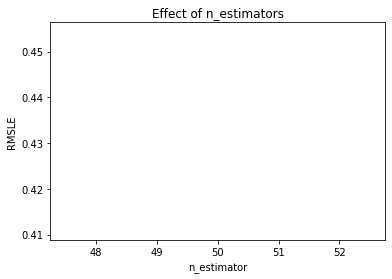

In [83]:
estimators =[50]
RMSLE = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    predictions_rf=model.predict(X_valid)
    RMSLE.append(np.sqrt(mean_squared_log_error(np.expm1(y_valid), np.expm1(predictions_rf))))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("RMSLE")
plt.plot(estimators, RMSLE)

In [84]:
RMSLE

[0.43261675502252905]

In [48]:
# get a stacking ensemble of models
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import StackingRegressor
#def get_stacking():
    # define the base models
   # level0 = list()
   # level0.append(('clf', XGBRegressor(n_estimators=468)))
   # level0.append(('lgb', LGBMRegressor(n_estimators=107)))
    #level0.append(('rf', RandomForestRegressor(n_estimators=50)))
    # define meta learner model
    #level1 = LinearRegression()
    # define the stacking ensemble
    #model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    #return model

# get a list of models to compare with the stack
def get_models():
    models = dict()
    models['clf'] = XGBRegressor(n_esimators=468)
    models['lgb'] = LGBMRegressor(n_estimators=107)
    models['rf'] = RandomForestRegressor(n_estimators=50)
    #models['stacking'] = get_stacking()
    return models

#evaluation should be done on the full data wen you are applying stacking 
def evaluate_model(model):
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)#
    scores = cross_val_score(model, final_train, target, scoring=None, cv=cv, n_jobs=-1, error_score='raise')#for regression, None takes rmse score
    return scores
#we did crossval_score on total_data... that was a huge mistake
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))





>clf 0.698 (0.016)
>lgb 0.706 (0.017)
>rf 0.717 (0.024)


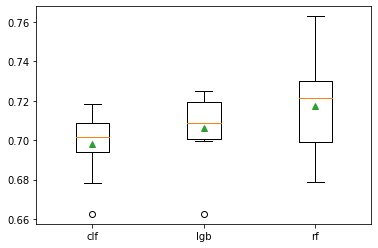

In [50]:
from matplotlib import pyplot
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [51]:
#we woud be using random forest to make our predictions
rf_pred=RandomForestRegressor(n_estimators=50)

In [53]:
rf_pred.fit(final_train,target)#use modes['rf'] to predict next time and for stacking, use model['stacking'] 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
rf_pred.predict(final_test)

array([ 8.88588823,  9.22705632,  9.57911416, 10.62109321,  8.56331243,
       10.25812017,  9.71662622,  9.4225852 ,  9.57594795,  9.85164345,
        9.66021368,  9.36315248,  9.58465124,  9.53707206, 10.9703329 ,
        8.72521776,  9.77780658,  9.07539111,  8.37233918,  9.84548805,
       10.34315265,  9.12040815, 10.0107286 ,  9.57311032,  9.40584675,
        9.89157868,  9.59230043,  9.94239036, 10.54490947,  7.86996684,
        9.62963601,  9.4319219 , 10.49990668,  9.50374213,  9.8164435 ,
       11.09281334,  9.67005853,  9.65012175,  9.48364973,  9.93008486,
        9.45080461, 10.72701759,  8.51561131,  9.63157973,  8.78610629,
        8.45787482,  9.98759508,  8.41284319,  9.40298303,  8.88802153,
        8.8021037 , 10.60614481,  9.2646606 ,  8.63172838, 11.02986128,
       10.06423375,  9.42589456,  9.75735602, 10.08574429,  8.44326468,
        8.63317783,  9.65673477,  8.81507998, 10.89750279, 10.71843116,
       11.31061891, 10.28695079, 10.0894839 ,  9.65209131,  8.97

In [63]:
rf_predi=np.exp(rf_pred.predict(final_test))

In [64]:
output=pd.DataFrame({'Price':rf_predi})
output.to_csv('submitted_new.csv',index=False)

In [65]:
subm=pd.read_csv('submitted_new.csv')

In [66]:
subm.head()

,Price
0,7229.233022
1,10168.564422
2,14459.604751
3,40990.401616
4,5235.996359


In [24]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('clf', XGBRegressor(n_estimators=468)))
    level0.append(('lgb', LGBMRegressor(n_estimators=107)))
    level0.append(('rf', RandomForestRegressor(n_estimators=50)))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1)
    return model

models=get_stacking()
models.fit(final_train, target)#the fit is called on all the data....
model_pred = models.predict(final_test)
print(models.score(X_train, y_train))
print(models.score(X_valid, y_valid))
print(models.score(final_train, target))


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Model_Info, Additional_Description